In [1]:
import pandas as pd

def check_governor_party(file_path, state, year):
    """Checks if the governor of the specified state in the specified year is Republican."""
    # Read the CSV file
    try:
        data = pd.read_csv(file_path)
        #print("CSV file loaded successfully.")
    except FileNotFoundError:
        print(f"File not found at path: {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print("No data in the file.")
        return None
    except pd.errors.ParserError:
        print("Error parsing the CSV file.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

    # Ensure the necessary columns are present
    if 'state' not in data.columns or 'year' not in data.columns or 'party' not in data.columns:
        print("One or more required columns are missing.")
        return None

    # Filter the data for the specified state and year
    specific_governor = data[(data['state'] == state) & (data['year'] == year)]

    # Check if the governor was Republican
    if not specific_governor.empty:
        is_republican = specific_governor['party'].iloc[0] == 'Republican'
        return is_republican
    else:
        print("No data found for the specified state and year.")
        return None

def check_governor_party_dem(file_path, state, year):
    """Checks if the governor of the specified state in the specified year is Republican."""
    # Read the CSV file
    try:
        data = pd.read_csv(file_path)
        #print("CSV file loaded successfully.")
    except FileNotFoundError:
        print(f"File not found at path: {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print("No data in the file.")
        return None
    except pd.errors.ParserError:
        print("Error parsing the CSV file.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

    # Ensure the necessary columns are present
    if 'state' not in data.columns or 'year' not in data.columns or 'party' not in data.columns:
        print("One or more required columns are missing.")
        return None

    # Filter the data for the specified state and year
    specific_governor = data[(data['state'] == state) & (data['year'] == year)]

    # Check if the governor was Republican
    if not specific_governor.empty:
        is_republican = specific_governor['party'].iloc[0] == 'Democrat'
        return is_republican
    else:
        print("No data found for the specified state and year.")
        return None

# Example usage
file_path = 'governor17752020.csv'
state = 'Connecticut'
year = 2014
result = check_governor_party(file_path, state, year)
print(result)

File not found at path: governor17752020.csv
None


CSV file loaded successfully.


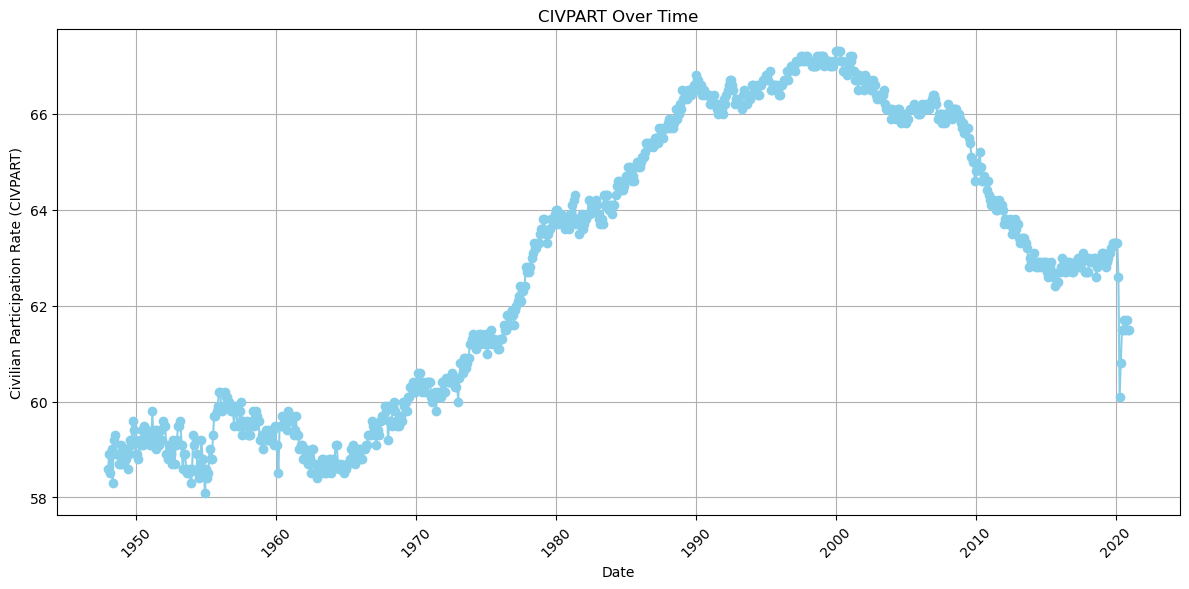

In [94]:
#national labor force participation rates

import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = 'national.csv'

# Read the CSV file
try:
    data = pd.read_csv(file_path)
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print(f"File not found at path: {file_path}")
    exit(1)
except pd.errors.EmptyDataError:
    print("No data in the file.")
    exit(1)
except pd.errors.ParserError:
    print("Error parsing the CSV file.")
    exit(1)
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit(1)

# Ensure the necessary columns are present
if 'DATE' not in data.columns or 'CIVPART' not in data.columns:
    print("One or more required columns are missing: 'DATE', 'CIVPART'")
    exit(1)

# Convert DATE column to datetime format if necessary
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Drop rows with invalid DATE values
data = data.dropna(subset=['DATE'])

# Create the chart
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['CIVPART'], marker='o', linestyle='-', color='skyblue')
plt.title('CIVPART Over Time')
plt.xlabel('Date')
plt.ylabel('Civilian Participation Rate (CIVPART)')
plt.xticks(rotation=45)
plt.grid()

# Show the chart
plt.tight_layout()
plt.show()

In [98]:
def graph_state(file_path, state, key):
    # Read the CSV file
    try:
        data = pd.read_csv(file_path)
        print("CSV file loaded successfully.")
    except FileNotFoundError:
        print(f"File not found at path: {file_path}")
        exit(1)
    except pd.errors.EmptyDataError:
        print("No data in the file.")
        exit(1)
    except pd.errors.ParserError:
        print("Error parsing the CSV file.")
        exit(1)
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        exit(1)
    
    # Ensure the necessary columns are present
    if 'DATE' not in data.columns or key not in data.columns:
        print("One or more required columns are missing: 'DATE', 'LBSSA02'")
        exit(1)
    
    # Convert DATE column to datetime format if necessary
    data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')
    
    # Drop rows with invalid DATE values
    data = data.dropna(subset=['DATE'])
    
    # Create the chart
    plt.figure(figsize=(12, 6))
    plt.plot(data['DATE'], data[key], marker='o', linestyle='-', color='skyblue')
    plt.title('Labor Force Participation Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Civilian Participation Rate')
    plt.xticks(rotation=45)
    
    # Add a vertical red line at the year 2010
    
    for year in range(1976, 2021):
        if check_governor_party('governor17752020.csv', state, year):
            # If true, add a vertical line for that year
           plt.axvline(pd.Timestamp(f'{year}-01-01'), color=(1, 0.5, 0.5), linestyle='-', linewidth=2, alpha=0.5, label=f'Year {year}')
    
    for year in range(1976, 2021):
        if check_governor_party_dem('governor17752020.csv', state, year):
            # If true, add a vertical line for that year
           plt.axvline(pd.Timestamp(f'{year}-01-01'), color=(0, 0, 1), linestyle='-', linewidth=2, alpha=0.5, label=f'Year {year}')
            
    #plt.axvline(pd.Timestamp('2010-01-01'), color='red', linestyle='-', linewidth=2, label='Year 2010')
    
    plt.grid()
    
    # Show the chart
    plt.tight_layout()
    plt.show()

CSV file loaded successfully.
No data found for the specified state and year.
No data found for the specified state and year.
No data found for the specified state and year.
No data found for the specified state and year.
No data found for the specified state and year.
No data found for the specified state and year.


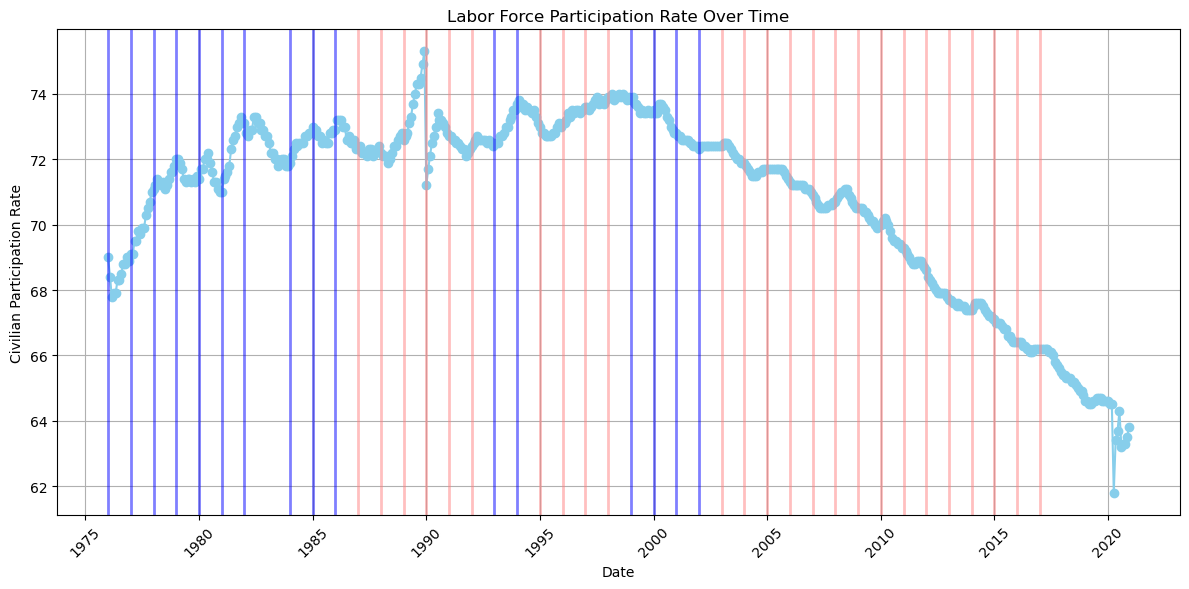

In [99]:
graph_state('alabama.csv', 'Alabama', 'LBSSA02')

CSV file loaded successfully.
No data found for the specified state and year.
No data found for the specified state and year.
No data found for the specified state and year.
No data found for the specified state and year.


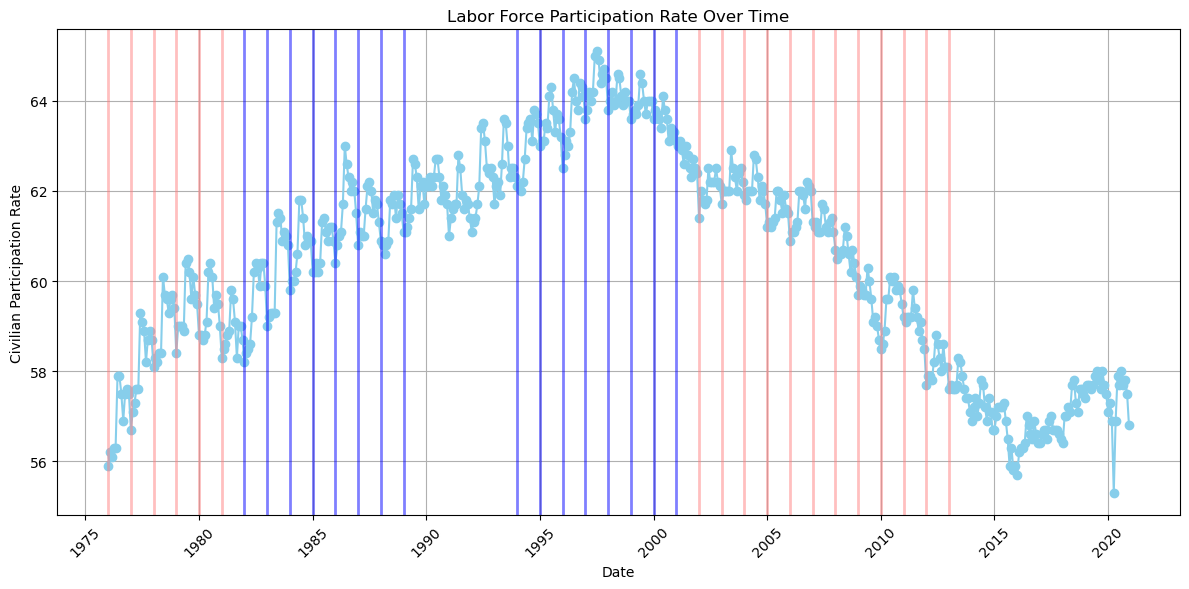

In [100]:
graph_state('alaska.csv', 'Alaska', 'LBSNSA01')